In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Program_3b_dataset.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.shape

(1372, 5)

In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

no missing values in the dataset

outlier finding:

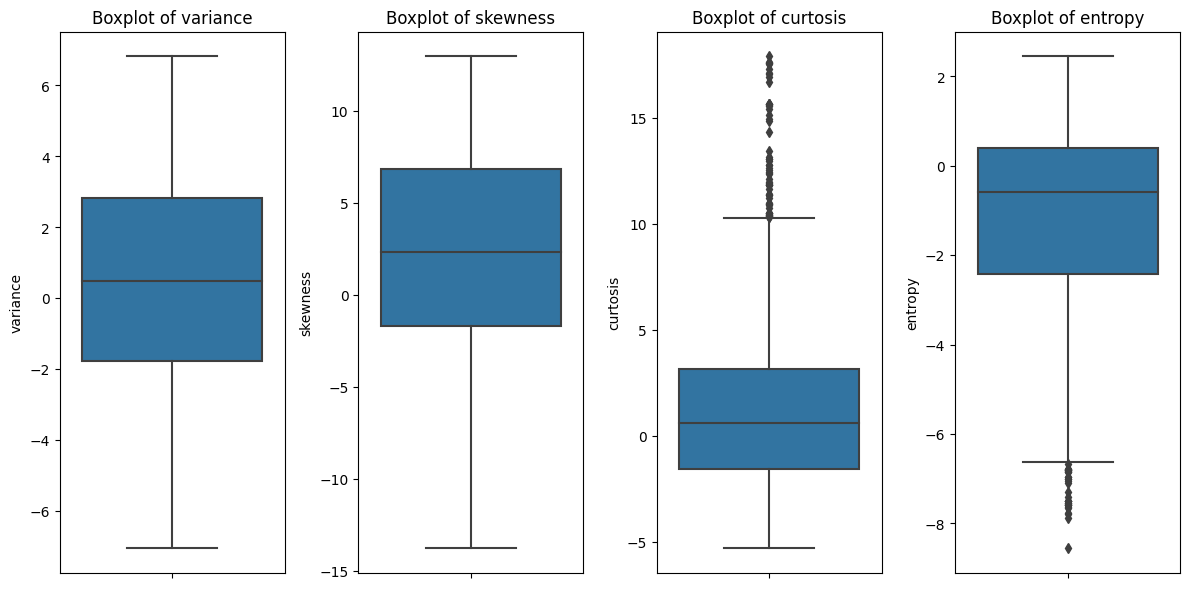

In [7]:
numerical_columns = ['variance', 'skewness', 'curtosis', 'entropy']

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [8]:
percentile25 = df['curtosis'].quantile(0.25)
percentile75 = df['curtosis'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f'Upper Limit: {upper_limit:.2f}')
print(f'Lower Limit: {lower_limit:.2f}')

Upper Limit: 10.31
Lower Limit: -8.71


In [9]:
df_no_outliers = df[(df['curtosis'] >= lower_limit) & (df['curtosis'] <= upper_limit)]

print(f'Shape before removing outliers: {df.shape}')
print(f'Shape after removing outliers: {df_no_outliers.shape}')

Shape before removing outliers: (1372, 5)
Shape after removing outliers: (1313, 5)


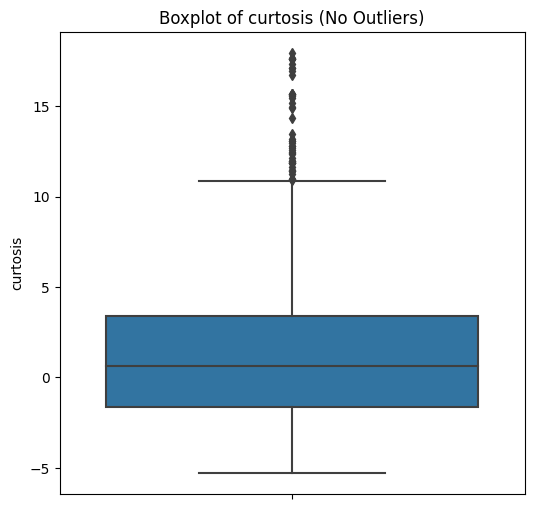

In [13]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_no_outliers['curtosis'])
plt.title('Boxplot of curtosis (No Outliers)')
plt.show()

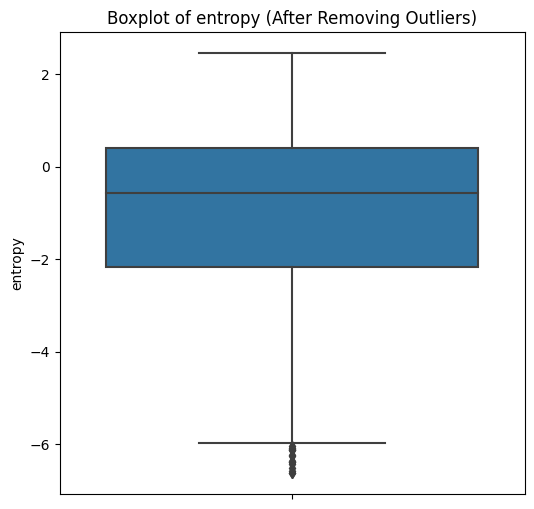

In [12]:
percentile25 = df['entropy'].quantile(0.25)
percentile75 = df['entropy'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df_no_outliers = df[(df['entropy'] >= lower_limit) & (df['entropy'] <= upper_limit)]

# Display box plot after removing outliers
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_no_outliers['entropy'])
plt.title('Boxplot of entropy (After Removing Outliers)')
plt.show()

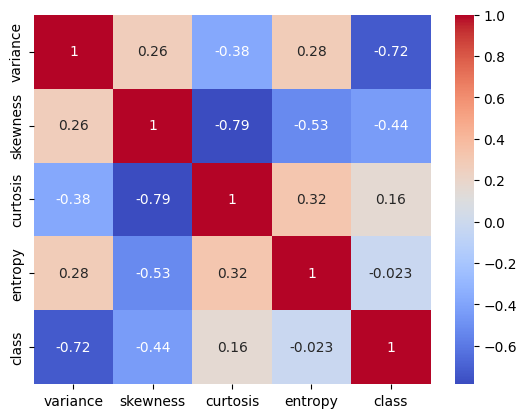

In [14]:
dataplot = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [15]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [16]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
train_preds = model.predict(X_train)

In [21]:
test_preds = model.predict(X_test)


In [22]:
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

In [24]:
print(train_accuracy)
print(test_accuracy)

0.9916666666666667
0.9878640776699029


In [25]:
print("Classification Report on Test Set:")
print(classification_report(y_test, test_preds))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



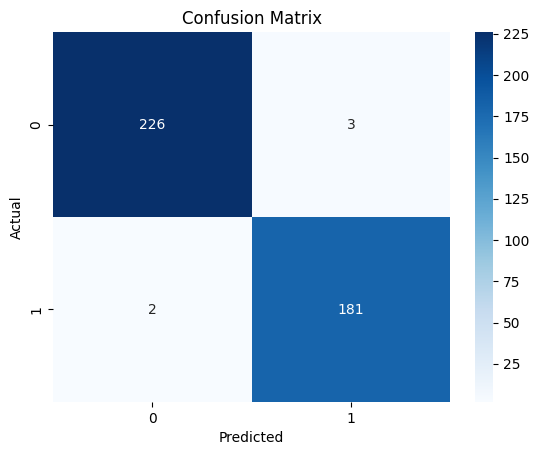

In [26]:
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The classification report demonstrates exceptional performance with high precision, recall, and F1-score for both classes. The model achieved a remarkable accuracy of 99%.